In [1]:
import cv2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.optimizers import SGD
import numpy as np
import random
import os

In [2]:
all_files = []
all_labels = []

### Load Training Data

In [3]:
path = './train/angry'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('anger')

    
path = './train/disgusted'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('disgust')
    
    
path = './train/fearful'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('fear')
    
    
path = './train/happy'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('happiness')
    

path = './train/neutral'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('neutral')
    
    
path = './train/sad'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('sadness')

    
path = './train/surprised'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('surprise')

### Load Testing Data

In [ ]:
path = './test/angry'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('anger')

    
path = './test/disgusted'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('disgust')
    
    
path = './test/fearful'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('fear')
    
    
path = './test/happy'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('happiness')
    

path = './test/neutral'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('neutral')
    
    
path = './test/sad'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('sadness')

    
path = './test/surprised'
dir_list = os.listdir(path)

for image_name in dir_list:
    all_files.append(path + '/' + image_name)
    all_labels.append('surprise')

In [5]:
def load_and_process(val):
    im = cv2.imread(val)
    return im

In [6]:
images = [load_and_process(path) for path in all_files]

### Example Data

In [7]:
images[0].shape

(48, 48, 3)

'happiness'

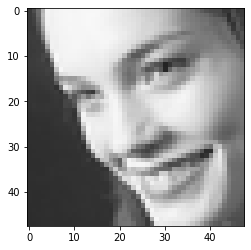

In [8]:
plt.imshow(images[10001])
all_labels[10001]

### Dataset Info

In [9]:
expressions = []
freq_table = dict()

for val in all_labels:
    
    if freq_table.get(val):
        freq_table[val] += 1
    else:
        freq_table[val] = 1
    
expressions = list(set(all_labels))

In [10]:
print('Images:', len(all_files))
print('Expression Types:', expressions)

Images: 35887
Expression Types: ['neutral', 'disgust', 'anger', 'surprise', 'fear', 'happiness', 'sadness']


### Distribution of Expressions in the FER2013 Dataset

<BarContainer object of 7 artists>

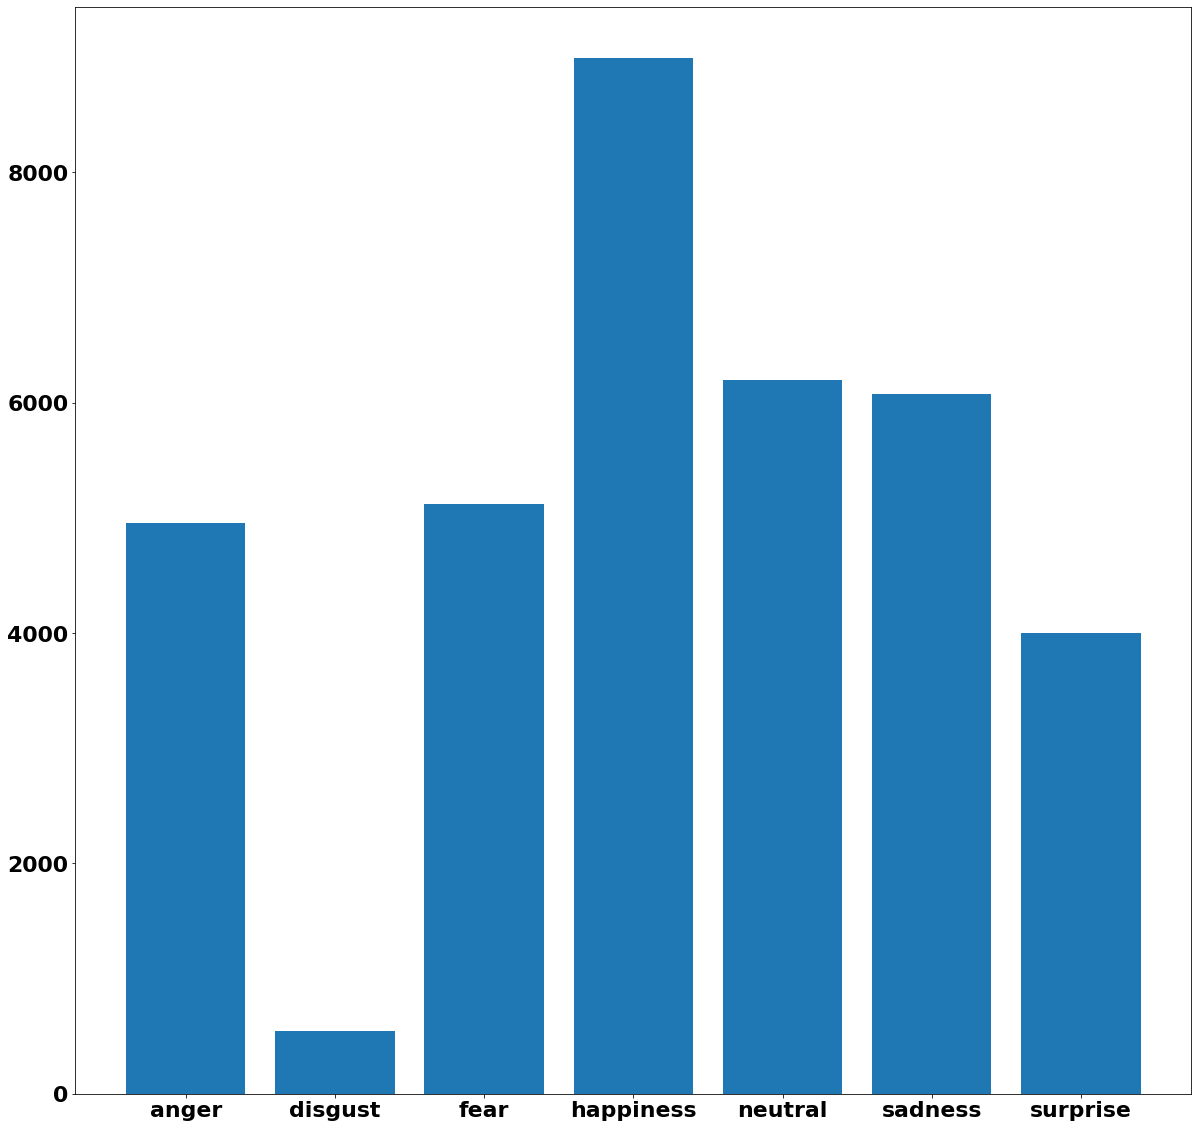

In [11]:
font = {'weight':'bold','size':22}
matplotlib.rc('font', **font)
plt.figure(figsize=(20, 20))
plt.bar(freq_table.keys(), freq_table.values())

### Encode and Shuffle Data

In [12]:
#encoded textual annotation to a unique integer
#group and randomized image-annotation pairs

encoded = []
encode_emotion = {'happiness':1, 'neutral':2, 'disgust':3, 'fear':4, 'anger':5, 'surprise':6, 'sadness':7}
for image, emotion in zip(images, all_labels):
    np_image = np.array(image)
    np_emotion = [encode_emotion[emotion]]
    encoded.append([np_image, np_emotion])

random.shuffle(encoded)

In [13]:
x_test = []
y_test = []

x_train = []
y_train = []

split_idx = round(len(encoded) * 0.1)

for i in range(len(encoded)):
    image = encoded[i][0]
    emotion = encoded[i][1]
    if i <= split_idx:
        x_test.append(image)
        y_test.append(emotion)
    else:
        x_train.append(image)
        y_train.append(emotion)

In [14]:
#format to input into model

x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = np.array(x_train)
y_train = np.array(y_train)

In [15]:
#one-hots encoding of integer representation of emotion annotation

y_test_hots = to_categorical(y_test)
y_train_hots = to_categorical(y_train)

In [16]:
#normalize images

x_test = x_test / 255
x_train = x_train / 255

In [17]:
x_test.shape

(3590, 48, 48, 3)

### Model

In [18]:
#define ideal model architecture

def create_model():
    #architecture
    model = Sequential()

    #convolution layer - 1
    model.add(Conv2D(48, (5,5), activation='relu', input_shape=(48,48,3)))

    #pooling layer - 2
    model.add(MaxPooling2D(pool_size = (2,2)))

    #convolution layer - 3
    model.add(Conv2D(48, (5,5), activation='relu'))

    #pooling layer - 4
    model.add(MaxPooling2D(pool_size = (2,2)))

    #flattening layer - 5
    model.add(Flatten())

    #neuron layer - 6
    model.add(Dense(1000, activation='relu'))

    #dropout layer - 7
    model.add(Dropout(0.5))

    #neuron layer - 8
    model.add(Dense(500, activation='relu'))

    #dropout layer - 9
    model.add(Dropout(0.5))

    #neuron layer - 10
    model.add(Dense(250, activation='relu'))

    #neuron layer - 11
    model.add(Dense(8, activation='softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [19]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 48)        3648      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 48)        57648     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3888)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3889000   
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0

### Train and Save

In [20]:
#Train model then save weights

checkpoint_path = "FER_model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)
hist = model.fit(x_train, y_train_hots, batch_size = 256, epochs = 30, validation_split = 0.1, callbacks = [cp_callback])

Epoch 1/30
114/114 [==============================] - ETA: 0s - loss: 1.7920 - accuracy: 0.2687
Epoch 00001: saving model to FER_model\cp.ckpt
114/114 [==============================] - 21s 183ms/step - loss: 1.7920 - accuracy: 0.2687 - val_loss: 1.6253 - val_accuracy: 0.3709
Epoch 2/30
114/114 [==============================] - ETA: 0s - loss: 1.5596 - accuracy: 0.3936 ETA: 2s - loss: 1.5694 - accuracy: 0.38 - ETA: 2s -
Epoch 00002: saving model to FER_model\cp.ckpt
114/114 [==============================] - 20s 178ms/step - loss: 1.5596 - accuracy: 0.3936 - val_loss: 1.4455 - val_accuracy: 0.4502
Epoch 3/30
114/114 [==============================] - ETA: 0s - loss: 1.4371 - accuracy: 0.4456
Epoch 00003: saving model to FER_model\cp.ckpt
114/114 [==============================] - 20s 177ms/step - loss: 1.4371 - accuracy: 0.4456 - val_loss: 1.3862 - val_accuracy: 0.4693
Epoch 4/30
114/114 [==============================] - ETA: 0s - loss: 1.3372 - accuracy: 0.4877
Epoch 00004: saving m

Epoch 30/30
114/114 [==============================] - ETA: 0s - loss: 0.1702 - accuracy: 0.9402
Epoch 00030: saving model to FER_model\cp.ckpt
114/114 [==============================] - 20s 177ms/step - loss: 0.1702 - accuracy: 0.9402 - val_loss: 2.1393 - val_accuracy: 0.5548


In [21]:
model = create_model()
loss, acc = model.evaluate(x_test, y_test_hots)
print('untrained model, accuracy: {:5.2f}%'.format(100*acc))

113/113 [==============================] - 1s 7ms/step - loss: 2.0796 - accuracy: 0.0223
untrained model, accuracy:  2.23%


In [22]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(x_test, y_test_hots)
print('trained model, accuracy: {:5.2f}%'.format(100*acc))

113/113 [==============================] - 1s 7ms/step - loss: 2.0679 - accuracy: 0.5671
trained model, accuracy: 56.71%


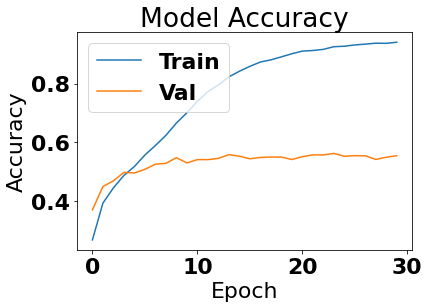

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

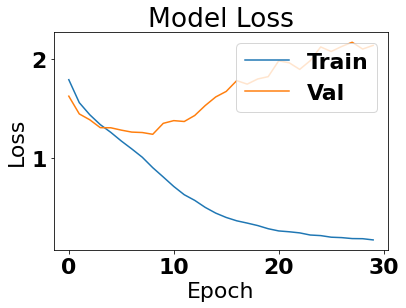

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Demo

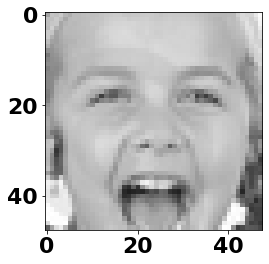

In [25]:
test_img = x_test[100]
plt.imshow(test_img)

In [26]:
#get results from model for this image

predictions = model.predict(np.array([test_img]))
predictions

array([[5.2739108e-07, 2.0708330e-02, 4.4942237e-04, 2.9612386e-03,
        9.2342877e-01, 4.6654571e-02, 1.6970342e-03, 4.1002133e-03]],
      dtype=float32)

In [27]:
#decode prediction

decode = {1:'happiness', 2:'neutral', 3:'disgust', 4:'fear', 5:'anger', 6:'surprise', 7:'sadness'}
list_idx = [1,2,3,4,5,6,7]
x = predictions

for i in range(len(list_idx)):
    for j in range(len(list_idx)):
        if x[0][list_idx[i]] > x[0][list_idx[j]]:
            temp = list_idx[i]
            list_idx[i] = list_idx[j]
            list_idx[j] = temp
            
print(list_idx)

[4, 5, 1, 7, 3, 6, 2]


In [28]:
for i in range(len(list_idx)):
    print(decode[list_idx[i]],':', round(predictions[0][list_idx[i]] * 100, 2), '%')

fear : 92.34 %
anger : 4.67 %
happiness : 2.07 %
sadness : 0.41 %
disgust : 0.3 %
surprise : 0.17 %
neutral : 0.04 %
